<a href="https://colab.research.google.com/github/yeonghun00/market-risk/blob/main/Risk%20Measurement%20Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install yfinance pandas numpy matplotlib
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 18.8 MB/s eta 0:00:00


### **Fetching Data**

In [11]:
def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()  # Calculate daily returns
    return stock_data

# Example: Apple stock
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch data
stock_data = fetch_data(ticker, start_date, end_date)
stock_data = stock_data.dropna()  # Drop rows with NaN values
returns = stock_data['Returns']

[*********************100%***********************]  1 of 1 completed


### **Risk Measurement Tools: Value at Risk (VaR) and Expected Shortfall (ES)**

In this section, we implement two commonly used market risk measurement tools: **Value at Risk (VaR)** and **Expected Shortfall (ES)**. These tools help assess the potential loss in a portfolio based on historical price data, providing insights into the risk level during adverse market conditions.

- **Value at Risk (VaR)** is a statistical technique used to measure the potential loss in an asset or portfolio over a specified time period with a given confidence level. For instance, a VaR at the 95% confidence level means that we can expect the portfolio to lose more than the VaR value only 5% of the time.

- **Expected Shortfall (ES)**, also known as Conditional VaR, takes the analysis one step further by calculating the **average loss** in the worst-case scenarios, i.e., beyond the VaR threshold. It provides a more accurate estimate of extreme losses during market downturns.



Value at Risk (VaR) at 95.0% confidence: -0.0348
Expected Shortfall (ES) beyond VaR: -0.0509


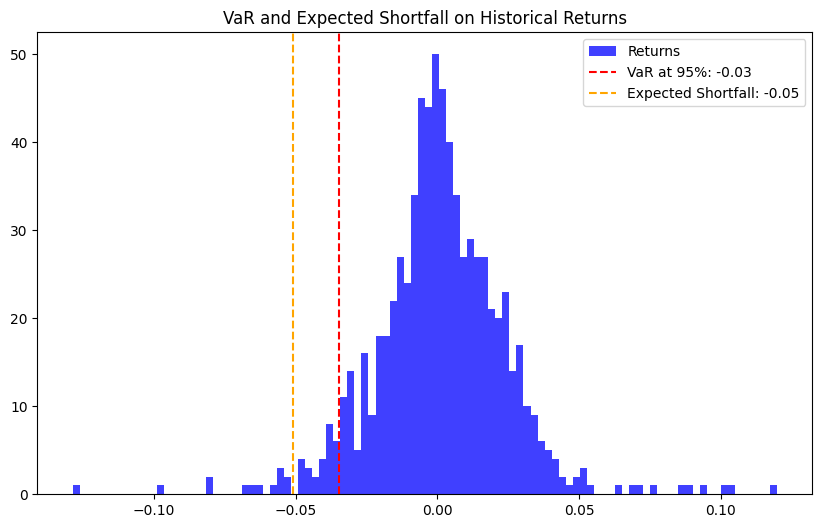

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_var(returns, confidence_level=0.95):
    """Calculate the Value at Risk (VaR) at the specified confidence level."""
    var_value = np.percentile(returns.dropna(), (1 - confidence_level) * 100)
    return var_value

def calculate_es(returns, var_value):
    """Calculate the Expected Shortfall (ES), which is the average loss beyond the VaR threshold."""
    worst_losses = returns[returns <= var_value]
    return worst_losses.mean()

def plot_var_es(returns, var_value, es_value):
    plt.figure(figsize=(10, 6))
    plt.hist(returns.dropna(), bins=100, alpha=0.75, color='blue', label='Returns')
    plt.axvline(var_value, color='red', linestyle='--', label=f'VaR at 95%: {var_value:.2f}')
    plt.axvline(es_value, color='orange', linestyle='--', label=f'Expected Shortfall: {es_value:.2f}')
    plt.title("VaR and Expected Shortfall on Historical Returns")
    plt.legend()
    plt.show()

# Parameters for analysis
confidence_level = 0.95  # 95% confidence level

# Calculate VaR and Expected Shortfall
var_value = calculate_var(returns, confidence_level)
es_value = calculate_es(returns, var_value)

# Output the results
print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence: {var_value:.4f}")
print(f"Expected Shortfall (ES) beyond VaR: {es_value:.4f}")

# Plot VaR and ES
plot_var_es(returns, var_value, es_value)


### **Volatility Modeling and Forecasting : (GARCH, EWMA, ARCH)**

### **1. GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**

**Explanation:**

The **GARCH(1,1)** model is a time-series model used to predict time-varying volatility in financial markets. It extends the **ARCH** model by including lagged conditional variances. GARCH captures **volatility clustering**, where periods of high volatility tend to be followed by other periods of high volatility.

#### **GARCH(1,1) Model Formula:**

$$
\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2
$$

Where:
- $\sigma_t^2$ is the conditional variance (volatility) at time $t$,
- $\omega$ is a constant term,
- $\alpha$ is the weight given to the previous squared error term $\epsilon_{t-1}^2$ (ARCH effect),
- $\beta$ is the weight given to the previous period’s volatility $\sigma_{t-1}^2$ (GARCH effect),
- $\epsilon_{t-1}$ is the error term (return shock) at time $t-1$.

The model assumes that today's volatility depends on both the past volatility and past errors. In practice, the **GARCH(1,1)** model is commonly used because it fits well with financial data.


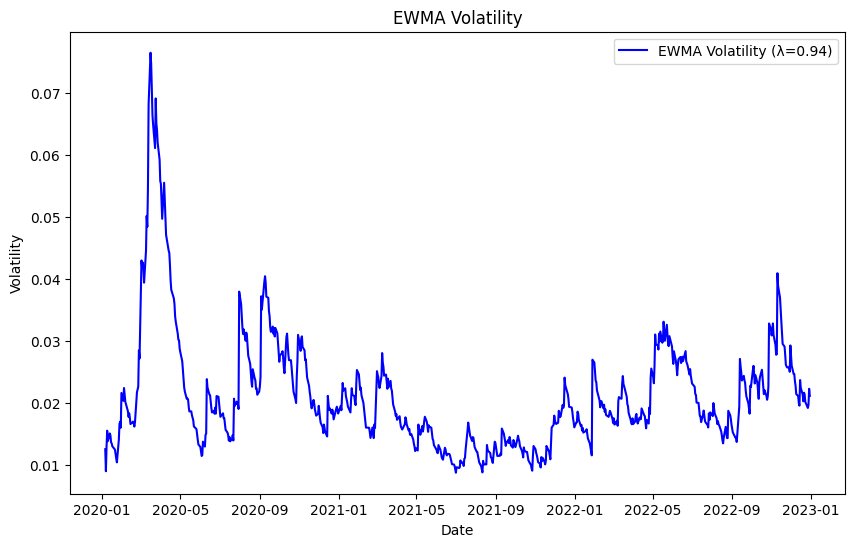

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate EWMA volatility
def calculate_ewma(returns, lambda_=0.94):
    ewma_volatility = returns.ewm(span=(1/(1 - lambda_)), adjust=False).std()
    return ewma_volatility

# Calculate EWMA volatility
ewma_volatility = calculate_ewma(returns)

# Plot EWMA volatility
plt.figure(figsize=(10, 6))
plt.plot(ewma_volatility, label='EWMA Volatility (λ=0.94)', color='blue')
plt.title('EWMA Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


### **2. EWMA (Exponentially Weighted Moving Average)**

**Explanation:**

The **EWMA** model is a simple yet powerful technique to estimate volatility. It gives **more weight to recent returns**, making it responsive to sudden changes in the market, while still accounting for past observations. This model is widely used in risk management, particularly in the calculation of **Value at Risk (VaR)**.

#### **EWMA Model Formula:**

$
\sigma_t^2 = (1 - \lambda) \cdot \epsilon_t^2 + \lambda \cdot \sigma_{t-1}^2
$

Where:
- $\sigma_t^2$ is the variance at time $t$,
- $\lambda$ is the **decay factor** (usually set around 0.94 in practice),
- $\epsilon_t^2$ is the squared return (or error) at time $t$,
- $\sigma_{t-1}^2$ is the variance from the previous time step.

The value of $\lambda$ controls the rate of decay of past volatility. A higher $\lambda$ (e.g., 0.94) means more weight is given to past volatilities, while a lower $\lambda$ means recent volatilities dominate.

**Common Practice:**
- $\lambda = 0.94$ is used in financial applications (like RiskMetrics), as it strikes a balance between responsiveness and smoothing of the volatility.


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005406. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


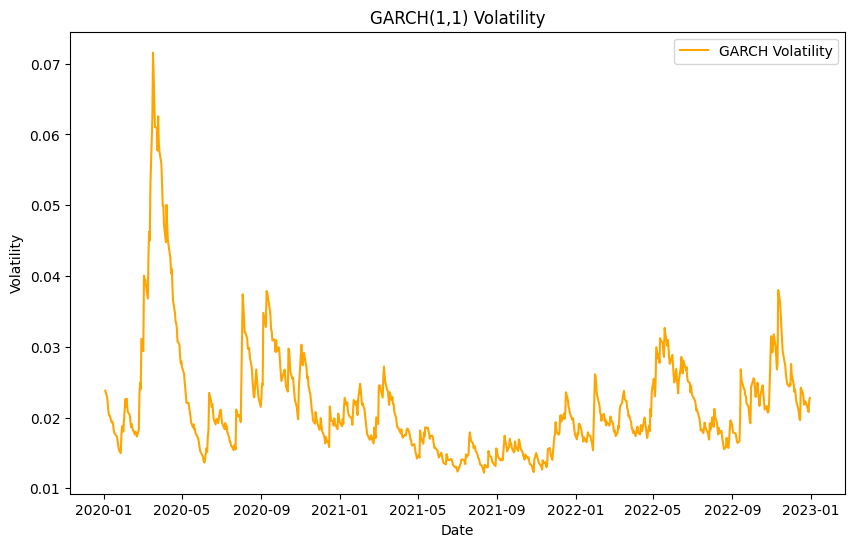

In [14]:
from arch import arch_model

# Fit a GARCH(1,1) model to the returns
def fit_garch(returns):
    model = arch_model(returns, vol='Garch', p=1, q=1)
    garch_fit = model.fit(disp="off")
    return garch_fit

# Fit the GARCH model and get conditional volatility
garch_fit = fit_garch(returns)
garch_volatility = garch_fit.conditional_volatility

# Plot GARCH volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_volatility, label='GARCH Volatility', color='orange')
plt.title('GARCH(1,1) Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


### **3. ARCH (Autoregressive Conditional Heteroskedasticity)**

**Explanation:**

The **ARCH** model, developed by Robert Engle, assumes that volatility at any point in time is dependent on the **squared returns** of previous periods. It is useful for modeling **heteroskedasticity**, where variance changes over time, a common phenomenon in financial time series.

#### **ARCH(1) Model Formula:**

$\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2$

Where:
- $\sigma_t^2$ is the conditional variance at time $t$,
- $\omega$ is a constant term,
- $\alpha$ is the weight given to the previous squared error $\epsilon_{t-1}^2$,
- $\epsilon_{t-1}$ is the error term (return shock) at time $t-1$.

The **ARCH(1)** model focuses on periods of high and low volatility, assuming that volatility today depends on the magnitude of the previous period's return shock.

The **ARCH** model is simpler than GARCH but still effectively captures periods of volatility clustering, making it suitable for detecting sudden bursts of volatility in financial markets.


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005406. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


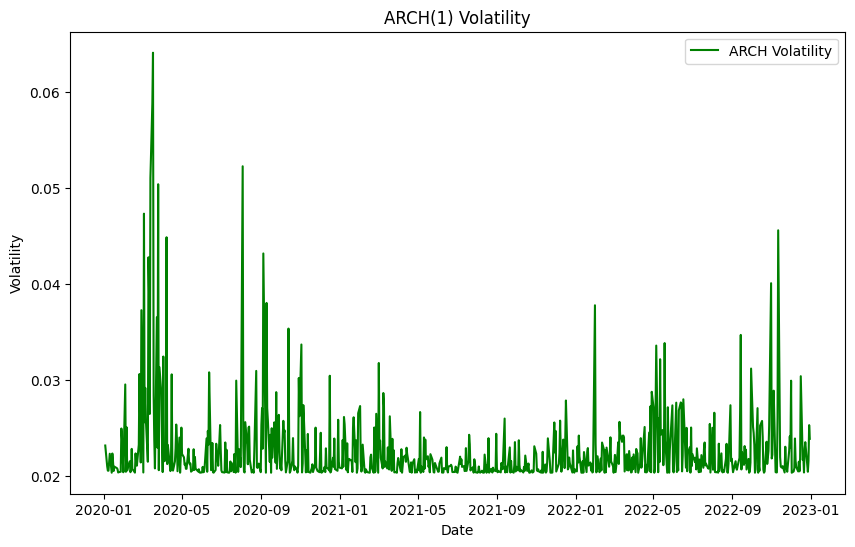

In [15]:
# Fit an ARCH(1) model to the returns
def fit_arch(returns):
    model = arch_model(returns, vol='ARCH', p=1)
    arch_fit = model.fit(disp="off")
    return arch_fit

# Fit the ARCH model and get conditional volatility
arch_fit = fit_arch(returns)
arch_volatility = arch_fit.conditional_volatility

# Plot ARCH volatility
plt.figure(figsize=(10, 6))
plt.plot(arch_volatility, label='ARCH Volatility', color='green')
plt.title('ARCH(1) Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


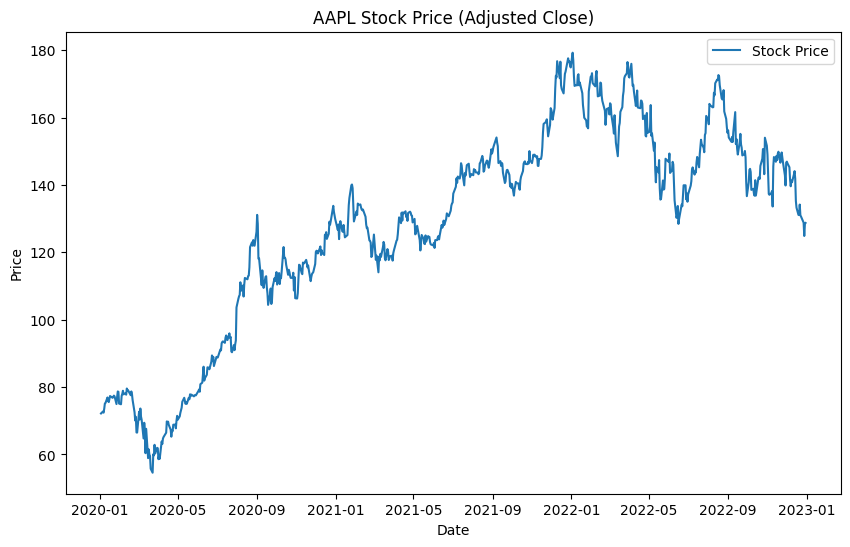

In [21]:
import matplotlib.pyplot as plt

# Plot the stock price data
def plot_stock_data(stock_data):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price')
    plt.title(f"{ticker} Stock Price (Adjusted Close)")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Visualize the data
plot_stock_data(stock_data)


In [23]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary, differencing required")

# Perform ADF test
adf_test(stock_data['Adj Close'])


ADF Statistic: -1.880835343096042
p-value: 0.3411297772069033
Data is not stationary, differencing required


In [25]:
# Apply differencing if necessary
stock_data['Differenced'] = stock_data['Adj Close'].diff().dropna()

# Check stationarity again on the differenced data
adf_test(stock_data['Differenced'].dropna())


ADF Statistic: -29.14571747522633
p-value: 0.0
Data is stationary


<ipython-input-25-1133feec5ac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Differenced'] = stock_data['Adj Close'].diff().dropna()


In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
def fit_arima_model(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    print(fitted_model.summary())
    return fitted_model

# Fit the model on original price data or differenced data
fitted_arima = fit_arima_model(stock_data['Adj Close'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  755
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1829.853
Date:                Sun, 15 Sep 2024   AIC                           3665.707
Time:                        00:41:06   BIC                           3679.583
Sample:                             0   HQIC                          3671.052
                                - 755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3940      0.372      1.059      0.289      -0.335       1.123
ma.L1         -0.4586      0.363     -1.262      0.207      -1.171       0.253
sigma2         7.5065      0.301     24.900      0.0

In [29]:
# Forecast the next 30 days
def forecast_arima(model, steps=30):
    forecast = model.get_forecast(steps=steps)
    forecasted_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    return forecasted_values, confidence_intervals

# Forecast the next 30 days
forecasted_values, confidence_intervals = forecast_arima(fitted_arima, steps=30)

# Show the forecasted values
print("Forecasted Prices:\n", forecasted_values)


Forecasted Prices:
 755    128.663055
756    128.640875
757    128.632136
758    128.628692
759    128.627335
760    128.626801
761    128.626590
762    128.626507
763    128.626474
764    128.626461
765    128.626456
766    128.626454
767    128.626454
768    128.626453
769    128.626453
770    128.626453
771    128.626453
772    128.626453
773    128.626453
774    128.626453
775    128.626453
776    128.626453
777    128.626453
778    128.626453
779    128.626453
780    128.626453
781    128.626453
782    128.626453
783    128.626453
784    128.626453
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: x and y must have same first dimension, but have shapes (31,) and (30,)

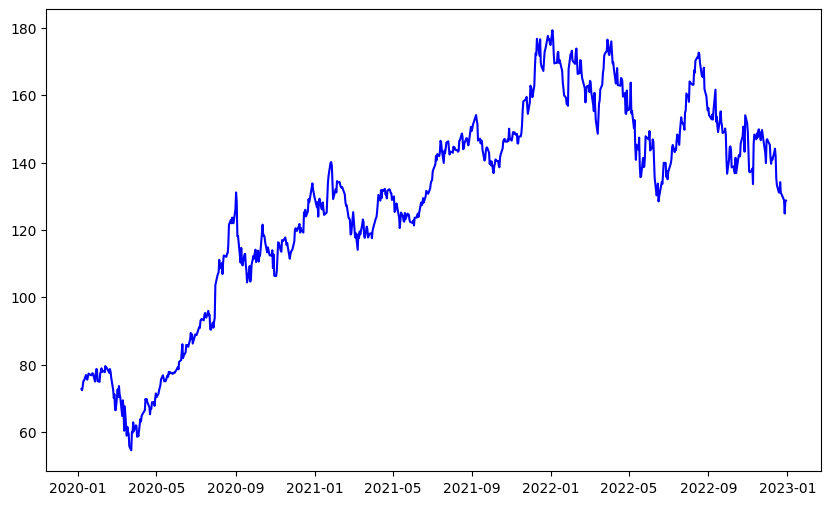

In [41]:
# Plot the forecast
def plot_forecast(stock_data, forecasted_values, confidence_intervals):
    plt.figure(figsize=(10, 6))

    # Plot historical data
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Historical Price', color='blue')

    # Create forecast index
    forecast_index = pd.date_range(start=stock_data.index[-1], periods=len(forecasted_values)+1)

    # Plot forecasted prices
    plt.plot(forecast_index, forecasted_values, label='Forecasted Price', color='green')

    # Plot confidence intervals
    plt.fill_between(forecast_index,
                     confidence_intervals.iloc[:, 0],
                     confidence_intervals.iloc[:, 1],
                     color='gray', alpha=0.3)

    plt.title(f"{ticker} Stock Price Forecast")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Plot the forecast and confidence intervals
plot_forecast(stock_data, forecasted_values, confidence_intervals)


In [33]:
# Calculate daily returns
def calculate_daily_returns(stock_data):
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()
    stock_data = stock_data.dropna()  # Drop any NaN values
    return stock_data

# Calculate returns
stock_data = calculate_daily_returns(stock_data)
stock_data.head()  # Display the first few rows


<ipython-input-33-efddff0618e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Returns'] = stock_data['Adj Close'].pct_change()


,Open,High,Low,Close,Adj Close,Volume,Returns,Differenced
Date,,,,,,,,
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742668,118387200,0.007968,0.575043
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000,-0.004703,-0.342125
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200,0.016086,1.164665
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.127785,170108400,0.021241,1.562576
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.297623,140644800,0.002261,0.169838


In [35]:
import numpy as np

# Monte Carlo simulation parameters
num_simulations = 1000  # Number of simulation runs
days = 252  # Number of days to simulate (1 year)

# Monte Carlo simulation
def monte_carlo_simulation(stock_data, num_simulations, days):
    last_price = stock_data['Adj Close'].iloc[-1]
    daily_returns = stock_data['Returns'].mean()
    volatility = stock_data['Returns'].std()

    # Create an empty matrix to store simulated price paths
    simulation_matrix = np.zeros((num_simulations, days))

    for i in range(num_simulations):
        # Daily random walk using normal distribution based on historical volatility and mean returns
        random_returns = np.random.normal(daily_returns, volatility, days)
        price_path = last_price * np.exp(np.cumsum(random_returns))  # Generate price path
        simulation_matrix[i, :] = price_path

    return simulation_matrix

# Run the Monte Carlo simulation
simulation_matrix = monte_carlo_simulation(stock_data, num_simulations, days)


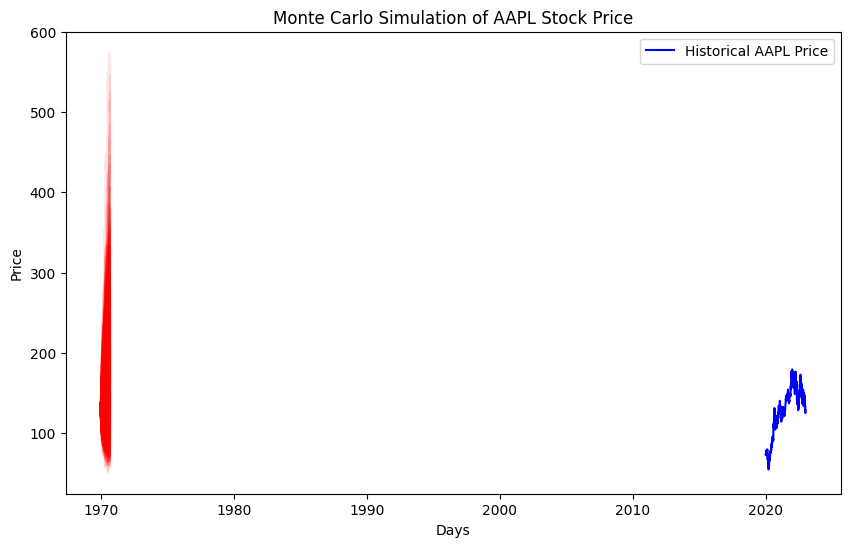

In [38]:
# Plot Monte Carlo simulation results
import matplotlib.pyplot as plt

def plot_monte_carlo(simulation_matrix, stock_data):
    plt.figure(figsize=(10, 6))

    # Plot multiple simulated price paths
    plt.plot(simulation_matrix.T, color='red', alpha=0.1)

    # Plot the historical stock price for comparison
    plt.plot(stock_data['Adj Close'], color='blue', label=f'Historical {ticker} Price')

    # Set plot labels and title
    plt.title(f'Monte Carlo Simulation of {ticker} Stock Price')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Plot the simulation results
plot_monte_carlo(simulation_matrix, stock_data)


In [39]:
# Calculate statistical measures of the simulation
def calculate_simulation_statistics(simulation_matrix):
    final_prices = simulation_matrix[:, -1]  # Final prices for all simulations
    mean_price = np.mean(final_prices)
    fifth_percentile = np.percentile(final_prices, 5)
    ninety_fifth_percentile = np.percentile(final_prices, 95)

    print(f"Mean simulated final price: ${mean_price:.2f}")
    print(f"5th percentile (worst case): ${fifth_percentile:.2f}")
    print(f"95th percentile (best case): ${ninety_fifth_percentile:.2f}")

# Calculate and print the statistics
calculate_simulation_statistics(simulation_matrix)


Mean simulated final price: $175.97
5th percentile (worst case): $91.16
95th percentile (best case): $295.91
